# Design Source for the Simulation: 

https://gmuedu-my.sharepoint.com/:w:/g/personal/lsherry_gmu_edu/
EfgvroI33EZBiexkDRLnbboBNAgbDQKwPbXoLcoRvGW80g?rtime=n89YgWtB2Ug

In [1]:
# randomly set the inital parameters
import random
import math
import time
import pandas as pd
import numpy as np


### set random seed

In [ ]:
rng = np.random.default_rng(19)

In [ ]:
def str_time_prop(start, end, time_format, prop):
    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(time_format, time.localtime(ptime))

In [ ]:
def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y %I:%M %p', prop)

# The typical sequence of events is as follows: 

1. Buffet 
2. Increasing positive Angle-of-Attack 
3. Decreasing airspeed
4. Uncommanded descent (e.g. - 300 fpm) 
5. Decreasing airspeed - high 
6. Uncommanded roll 
7. Uncommanded descent – high (e.g. -1200 fpm) 

## Simulation setup conditions
* Time from Buffet to Uncommanded Roll (secs) -> Cannot be less than Time from Buffet to Uncommanded Descent (secs) 
* Time from Buffet to Uncommanded Descent - High (secs)  -> Cannot be less than Time from Buffet to Uncommanded Descent (secs)  
* Time from Buffet to Positive Angle of Attack (secs)  -> Cannot be less than Time from Buffet to Uncommanded Descent
* Max Angle of Attack (degs, max 10 degrees)  ->  Max 30 
* Initial Airspeed (Knots)  -> 120 – 300 knots 
* Initial Altitude (ft)  -> 5000 – 43,000 
* Time to Buffet (secs)  -> 

In [ ]:
### main class which assigns initial parameters and dynamic parameters for every 2 secs
class FlightJourney:
    
    def __init__(self, name, flight_time):
        self.name = name
        self.flight_time = flight_time
        self.initial_altitude = random.randint(5000,43000)
        self.time_to_buffet = random.randint(50,100)
        
        
        self.time_from_buffet_to_positive_angle_of_Attack = round( 
                                                                    np.random.uniform(
                                                                        self.time_to_buffet + round(np.random.uniform(0,5), 1),
                                                                        self.time_to_buffet + round(np.random.uniform(6,10), 1))
                                                                    , 1)

        self.time_from_buffet_to_uncommanded_descent = round(
                                                              np.random.uniform(
                                                                  self.time_from_buffet_to_positive_angle_of_Attack + round(np.random.uniform(0,5), 1),
                                                                  self.time_from_buffet_to_positive_angle_of_Attack + round(np.random.uniform(6,10), 1))              
                                                              ,1)
        
                
        self.time_from_buffet_to_uncommanded_roll = round(
                                                            np.random.uniform(
                                                                self.time_from_buffet_to_uncommanded_descent + round(np.random.uniform(0,5), 1),
                                                                self.time_from_buffet_to_uncommanded_descent + round(np.random.uniform(6,10), 1))
                                                            ,1) 
        
        
        self.time_from_buffet_to_uncommanded_decent_high = round(
                                                                  np.random.uniform(
                                                                      self.time_from_buffet_to_uncommanded_roll + round(np.random.uniform(0,5), 1),
                                                                      self.time_from_buffet_to_uncommanded_roll + round(np.random.uniform(6,10), 1))
                                                                  ,1)

        # intial airspeed converted to fpm
        self.knots_to_fps = 101.2685914252 / 60
        self.initial_airspeed = random.randint(120,300) * self.knots_to_fps
        self.air_speed_noise = random.randint(0,5) * self.knots_to_fps
        self.air_speed_noise_buffet =  random.randint(5,10) * self.knots_to_fps
        
        
        self.rate_of_change_AOA = round(random.random(), 2)
        
        self.mag_of_uncommanded_descent = random.randint(30,300) / 60
        self.mag_of_uncommanded_descent_high = random.randint(301,1500) / 60
        self.mag_of_uncommanded_roll = random.randint(2,25)
        self.alt_avg_num_points = 20
        
        

    
    # main function to calculate the dynamic parameters
    def cal_flight_parameters(self):
        flight_parameters = []
        knots_to_fps = self.knots_to_fps
        altitude = self.initial_altitude
        vertical_speed = 0
        airspeed = self.initial_airspeed
        roll = 0
        AOA = 0
        flight_path_angle = 0
        pitch = 0
        prv_alt_ar = []
        prv_alt_ar.append(self.initial_altitude)
        past_altitude = self.initial_altitude
        prv_alt_std = np.std(prv_alt_ar)
        vertical_speed_ar = []
        roll_ar = []
        aoa_ar = []
        flight_path_angle_ar = []
        stall = 0
        prv_stall = 0
        journey_start = self.time_to_buffet - 15
        delta_time = 0.1
        prv_airspeed = self.initial_airspeed
        prv_roll = self.mag_of_uncommanded_roll
        
        for time in np.arange(journey_start, self.time_from_buffet_to_uncommanded_decent_high + 10, delta_time):
            flight_parameter = {}
            flight_parameter['name'] = self.name
            flight_parameter['time_to_buffet'] = self.time_to_buffet
            flight_parameter['time_from_buffet_to_positive_angle_of_Attack'] = 	self.time_from_buffet_to_positive_angle_of_Attack
            flight_parameter['time_from_buffet_to_uncommanded_descent'] = self.time_from_buffet_to_uncommanded_descent
            flight_parameter['time_from_buffet_to_uncommanded_roll'] = self.time_from_buffet_to_uncommanded_roll
            flight_parameter['time_from_buffet_to_uncommanded_decent_high'] = self.time_from_buffet_to_uncommanded_decent_high
            flight_parameter['rate_of_change_AOA'] = self.rate_of_change_AOA
            flight_parameter['mag_of_uncommanded_descent'] = self.mag_of_uncommanded_descent 
            flight_parameter['mag_of_uncommanded_descent_high'] = self.mag_of_uncommanded_descent_high
            flight_parameter['mag_of_uncommanded_roll '] = self.mag_of_uncommanded_roll 
            flight_parameter['alt_avg_num_points '] = self.alt_avg_num_points
            flight_parameter['initial_altitude'] = self.initial_altitude
            flight_parameter['time'] = time
            airspeed = self.initial_airspeed
 
#mag_of_uncommanded_descent_high = 10 ft per second
#we're at 1/0th of a second -> in order to use this, we divide by 

            #Alt Calculation
            #Take average of passt 
            #change below randint to np.random.normal(0,5)
            if time > self.time_from_buffet_to_uncommanded_decent_high:
                altitude = altitude - (self.mag_of_uncommanded_descent_high / 10  ) + np.random.normal(0,5) / 10
                #print('changin alt in 1')
            elif time > self.time_from_buffet_to_uncommanded_descent:
                altitude = altitude - (self.mag_of_uncommanded_descent / 10 ) + np.random.normal(0,5) / 10
                #print('changin alt in 2')
            elif time > (self.time_from_buffet_to_uncommanded_descent - 5):
              # need to have more buffeting by good variance
                altitude = self.initial_altitude + np.random.normal(0,10) / 10
                #print('changin alt in 3')
            else:
                altitude = self.initial_altitude + np.random.normal(0,5) / 10
                #print('changin alt in 4')


            ## do not average if distribution of noise has changed, self.time_from_buffet_to_uncommanded_descent
            if time <= self.time_to_buffet:
              altitude = (np.mean(prv_alt_ar[-self.alt_avg_num_points:]) + altitude) / 2

            flight_parameter['altitude'] = round(altitude, 2)
            
            # Vertical speed
            ## convert to fpm
            ## 0.1 seconds -> (altitude - past_altitude)
            ## 60 seconds  ->  x
            ## 60 / 0.1 = x/(altitude - past_altitude)
            ## x = (altitude - past_altitude) * 600
            avg_altitude = (np.mean(prv_alt_ar[-self.alt_avg_num_points:]) + altitude) / 2
            vertical_speed = ((altitude - past_altitude)) / delta_time
            flight_parameter['vertical_speed'] = round(vertical_speed, 2)
            #print(f'vertical speed: {vertical_speed}')
            # Roll calculation      
            # degree of roll should be between 2-45 degrees      
            if time > self.time_from_buffet_to_uncommanded_roll:                
                roll = math.sin(math.radians(prv_roll))
                prv_roll = min((prv_roll + np.random.uniform(0,2)), 45)

            flight_parameter['roll'] = round(roll, 2)
                
            
            # Angle of attack calculation
            if time < self.time_from_buffet_to_positive_angle_of_Attack:
                AOA = 0
            else:
                AOA = AOA + self.rate_of_change_AOA
            flight_parameter['AOA'] = round(AOA, 2)
                
            
            # air speed calculation
            
            if time > self.time_to_buffet: 
              airspeed = airspeed + ((np.random.normal(0,5) * knots_to_fps / 10))
            if time > self.time_from_buffet_to_uncommanded_descent:
              airspeed = airspeed + ((np.random.normal(0,10) * knots_to_fps  / 10))

            #airspeed = airspeed * 101.2685914252
            flight_parameter['airspeed'] = round(airspeed, 2)
            #print(f'vertical_speed: {vertical_speed}, airspeed: {airspeed}')
            #print(f'time: {time}, time_to_buffet: {self.time_to_buffet}, airspeed:{airspeed}')    
            # Flight Path Angle calculation
            ## asin takes value between -1 and 1
            if(airspeed != 0):              
              asin_in_tmp = vertical_speed/airspeed
              asin_in = asin_in_tmp
              if asin_in_tmp < -1 or asin_in_tmp > 1:
                print(f'initial altitude: {self.initial_altitude},current altitude: {altitude}, past altitude: {past_altitude}')
                print(f'vertical_speed: {vertical_speed}, initial airspeed:{self.initial_airspeed }, current airspeed: {airspeed}')
                print(f'uncomm desc: {self.mag_of_uncommanded_descent}, uncomm desc high: {self.mag_of_uncommanded_descent_high}')
                print(f'time: {time}, time to buffet: {self.time_to_buffet}, buffet to uncomm desc: {self.time_from_buffet_to_uncommanded_descent}, buffet to uncomm desc high: {self.time_from_buffet_to_uncommanded_decent_high}')
              #print(f'initial altitude: {self.initial_altitude}, curren altitude: {altitude}, past altitude: {past_altitude},\
              #mag_of_uncommanded_descent : {self.mag_of_uncommanded_descent},\
              #mag_of_uncommanded_descent_high: {self.mag_of_uncommanded_descent_high}, vertical speed: {vertical_speed}, air speed: {airspeed}')                
              #  asin_in = -1
              #elif asin_in_tmp > 1:
              #  asin_in = 1
              flight_path_angle = math.asin(asin_in) * 57.2958
              flight_parameter['flight_path_angle'] = round(flight_path_angle, 2)
            
            #pitch
            pitch = flight_path_angle + AOA
            flight_parameter['pitch'] = round(pitch, 2)
            if time == 0:
              vertical_speed_ar.extend([vertical_speed] * 2)
              roll_ar.extend([roll] * 2)
              aoa_ar.extend([AOA] * 2)
              flight_path_angle_ar.extend([flight_path_angle] * 2)
            else:
              vertical_speed_ar.append(vertical_speed)
              roll_ar.append(roll)
              aoa_ar.append(AOA)
              flight_path_angle_ar.append(flight_path_angle)

            past_altitude = altitude
            prv_alt_ar.append(past_altitude)
            cur_alt_std = np.std(prv_alt_ar)
            #prv_alt_std > 2 and cur_alt_std > 2 and 
            if time > self.time_to_buffet:            
              stall = 1
              if aoa_ar[-1] > aoa_ar[-2] and aoa_ar[-1]  > 0 and prv_airspeed > airspeed:
                stall = 2
                # this is uncommanded descent
                if vertical_speed_ar[-1] < vertical_speed_ar[-2] and prv_alt_std > 7 and cur_alt_std >7:
                  stall = 3
                  # this is uncommanded roll and uncommanded descent high
            if stall < prv_stall:
              stall = prv_stall
            prv_alt_std = cur_alt_std
            flight_parameter['stall'] = stall
            flight_parameters.append(flight_parameter)
            prv_stall = stall
            prv_airspeed = airspeed

        return pd.DataFrame(flight_parameters)
        

### Simulate flight journey for different parameters

In [ ]:
for fn in range(0,500):
  %%timeit
  for i in range(0,100):
      flight_date = random_date("1/1/2008 1:30 PM", "1/1/2009 4:50 AM", random.random())
      flightjourney = FlightJourney("ABX"+str(fn) + '-' + str(i),flight_date)
      tmp_df = flightjourney.cal_flight_parameters()
      if(i == 0):
        sim_data_df = tmp_df.copy()
      else:
        sim_data_df = sim_data_df.append(tmp_df, ignore_index=True)
  out_fn = 'sim_' + str(fn) + '_data.pq'
  sim_data_df.to_parquet(out_fn)

### Concatenate multiple simulation data into one file

In [ ]:
from pathlib import Path
import pandas as pd

data_dir = Path('./')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.pq')
)
full_df.to_parquet('final_data.pq')

In [ ]:
model_data.to_parquet('sim5k.pq')

### Split data into train and test


In [ ]:
# Split test and train / subsetting
import random 
random.seed(21)
names = full_df['name'].unique().tolist()

# subset to use 5k simulations to start with
sim5k_names = random.sample(names, 5000)
model_data = full_df[full_df['name'].isin(sim5k_names)].copy()
model_data.to_parquet('sim5k.pq')

# split 5k into train and test 70/30
names = model_data['name'].unique().tolist()
num_test = round(len(names) * 0.3)
test_names = random.sample(names, num_test)
train_names = np.setdiff1d(names,test_names)
print(f'test names: {len(test_names)}, train names: {len(train_names)}')
model_data[model_data['name'].isin(test_names)].to_parquet('sim5k_test_data.pq')
model_data[model_data['name'].isin(train_names)].to_parquet('sim5k_train_data.pq')

test names: 1500, train names: 3500


In [ ]:
sim_df.head()

,name,time_to_buffet,time_from_buffet_to_positive_angle_of_Attack,time_from_buffet_to_uncommanded_descent,time_from_buffet_to_uncommanded_roll,time_from_buffet_to_uncommanded_decent_high,rate_of_change_AOA,mag_of_uncommanded_descent,mag_of_uncommanded_descent_high,mag_of_uncommanded_roll,alt_avg_num_points,initial_altitude,time,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,stall
0,ABX0-0,50,59.8,64.1,70.5,78.9,0.86,4.683333,17.633333,14,20,26928,35.0,26928.06,0.61,0.0,0.0,374.69,0.09,0.09,0
1,ABX0-0,50,59.8,64.1,70.5,78.9,0.86,4.683333,17.633333,14,20,26928,35.1,26928.15,0.85,0.0,0.0,374.69,0.13,0.13,0
2,ABX0-0,50,59.8,64.1,70.5,78.9,0.86,4.683333,17.633333,14,20,26928,35.2,26927.81,-3.32,0.0,0.0,374.69,-0.51,-0.51,0
3,ABX0-0,50,59.8,64.1,70.5,78.9,0.86,4.683333,17.633333,14,20,26928,35.3,26928.39,5.78,0.0,0.0,374.69,0.88,0.88,0
4,ABX0-0,50,59.8,64.1,70.5,78.9,0.86,4.683333,17.633333,14,20,26928,35.4,26928.25,-1.41,0.0,0.0,374.69,-0.22,-0.22,0


In [ ]:
xgb_pred = [52, 58.8, 69.6]
lr_pred = [52, 54.1, 68.9]
lstm_pred = []7

# Read simulation data and generate visualizations

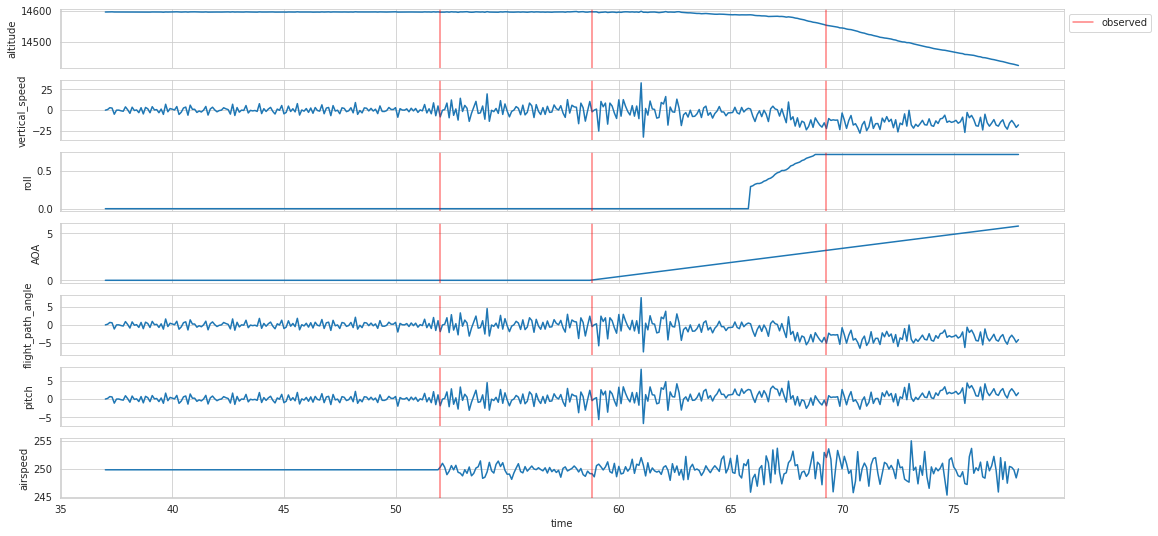

In [2]:
#flight_date = random_date("1/1/2008 1:30 PM", "1/1/2009 4:50 AM", random.random())
#flightjourney = FlightJourney("ABX-SINGLE-SIM",flight_date)
#tmp_df = flightjourney.cal_flight_parameters()
#sim_df = tmp_df.copy()
sim_df = pd.read_parquet('single_sim_new.pq')
#sim_df = model_data[model_data['name'] == 'ABX496-50']
stall_time = sim_df.loc[sim_df['stall'] == 1, ['time']].min().values[0]
stall_time_2 = sim_df.loc[sim_df['stall'] == 2, ['time']].min().values[0]
stall_time_3 = sim_df.loc[sim_df['stall'] == 3, ['time']].min().values[0]

## Make plots 
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.path as mpath

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1, nrows=7, figsize=(18,9), sharex=True)
plt = sns.lineplot(x='time', y='altitude', data=sim_df, ax=axs[0])
axs[0].axvline(stall_time, color='red', alpha = 0.5, label = 'observed')
axs[0].axvline(stall_time_2, color='red', alpha = 0.5)
axs[0].axvline(stall_time_3, color='red', alpha = 0.5)
#axs[0].axvline(xgb_pred[0], color='green', alpha = 0.75, label = 'XGBoost')
#axs[0].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[0].axvline(xgb_pred[2], color='green', alpha = 0.75)
#axs[0].axvline(lr_pred[0], color='blue', alpha = 0.45, label = 'Logistic Regression')
#axs[0].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[0].axvline(lr_pred[2], color='blue', alpha = 0.45)
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')


plt = sns.lineplot(x='time', y='vertical_speed', data=sim_df, ax=axs[1])
axs[1].axvline(stall_time, color='red', alpha = 0.5)
axs[1].axvline(stall_time_2, color='red', alpha = 0.5)
axs[1].axvline(stall_time_3, color='red', alpha = 0.5)
#axs[1].axvline(xgb_pred[0], color='green', alpha = 0.75)
#axs[1].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[1].axvline(xgb_pred[2], color='green', alpha = 0.75)
#axs[1].axvline(lr_pred[0], color='blue', alpha = 0.45)
#axs[1].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[1].axvline(lr_pred[2], color='blue', alpha = 0.45)

plt = sns.lineplot(x='time', y='roll', data=sim_df, ax=axs[2])
axs[2].axvline(stall_time, color='red', alpha = 0.5)
axs[2].axvline(stall_time_2, color='red', alpha = 0.5)
axs[2].axvline(stall_time_3, color='red', alpha = 0.5)
#axs[2].axvline(xgb_pred[0], color='green', alpha = 0.75)
#axs[2].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[2].axvline(xgb_pred[2], color='green', alpha = 0.75)
#axs[2].axvline(lr_pred[0], color='blue', alpha = 0.45)
#axs[2].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[2].axvline(lr_pred[2], color='blue', alpha = 0.45)

plt = sns.lineplot(x='time', y='AOA', data=sim_df, ax=axs[3])
axs[3].axvline(stall_time, color='red', alpha = 0.5)
axs[3].axvline(stall_time_2, color='red', alpha = 0.5)
axs[3].axvline(stall_time_3, color='red', alpha = 0.5)
#axs[3].axvline(xgb_pred[0], color='green', alpha = 0.75)
#axs[3].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[3].axvline(xgb_pred[2], color='green', alpha = 0.75)
#axs[3].axvline(lr_pred[0], color='blue', alpha = 0.45)
#axs[3].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[3].axvline(lr_pred[2], color='blue', alpha = 0.45)

plt = sns.lineplot(x='time', y='flight_path_angle', data=sim_df, ax=axs[4])
axs[4].axvline(stall_time, color='red', alpha = 0.5)
axs[4].axvline(stall_time_2, color='red', alpha = 0.5)
axs[4].axvline(stall_time_3, color='red', alpha = 0.5)
#axs[4].axvline(xgb_pred[0], color='green', alpha = 0.75)
#axs[4].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[4].axvline(xgb_pred[2], color='green', alpha = 0.75)
#axs[4].axvline(lr_pred[0], color='blue', alpha = 0.45)
#axs[4].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[4].axvline(lr_pred[2], color='blue', alpha = 0.45)

plt = sns.lineplot(x='time', y='pitch', data=sim_df, ax=axs[5])
axs[5].axvline(stall_time, color='red', alpha = 0.5)
axs[5].axvline(stall_time_2, color='red', alpha = 0.5)
axs[5].axvline(stall_time_3, color='red', alpha = 0.5)
#axs[5].axvline(xgb_pred[0], color='green', alpha = 0.75)
#axs[5].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[5].axvline(xgb_pred[2], color='green', alpha = 0.75)
#axs[5].axvline(lr_pred[0], color='blue', alpha = 0.45)
#axs[5].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[5].axvline(lr_pred[2], color='blue', alpha = 0.45)

plt = sns.lineplot(x='time', y='airspeed', data=sim_df, ax=axs[6])
axs[6].axvline(stall_time, color='red', alpha = 0.5)
axs[6].axvline(stall_time_2, color='red', alpha = 0.5)
axs[6].axvline(stall_time_3, color='red', alpha = 0.5)

#axs[6].axvline(xgb_pred[0], color='green', alpha = 0.75)
#axs[6].axvline(xgb_pred[1], color='green', alpha = 0.75)
#axs[6].axvline(xgb_pred[2], color='green', alpha = 0.75)

#axs[6].axvline(lr_pred[0], color='blue', alpha = 0.45)
#axs[6].axvline(lr_pred[1], color='blue', alpha = 0.45)
#axs[6].axvline(lr_pred[2], color='blue', alpha = 0.45)



left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 10   # the bottom of the subplots of the figure
top = 11      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
fig.savefig('single_sim_obs.png')

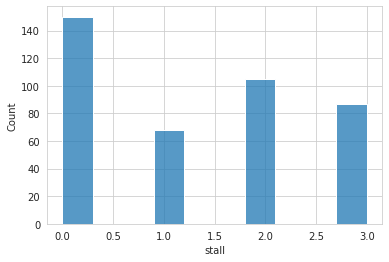

In [ ]:
sns.histplot(data = sim_df, x = "stall")

In [ ]:
sim_df.stall.unique()
sim_data_df['name'].unique()

array([0, 1, 2, 3])

**Things to do**


1.   Averaging the altitude across last 20 data points, as per comments in the code
2.   make sure roll results in 5 - 45 degress since the buffet starts
3. write the simulation results to a parquet file (append after each simulation)
4. make plots of distrubutions of the dependent variables.
5. change below randint to np.random - Jesse
6. Identify Stall
  * check variance in altitude
  * std <5 then not an onset of stall
  * std>7 for a period of time, it is onset of stall,
  * start checking vertical speed
  * flight path angle, angle of attack
  * roll
7. update the altitude calcualation not to average when distribution changes (onset of buffet)
8. Run for 25k and save the data and share.

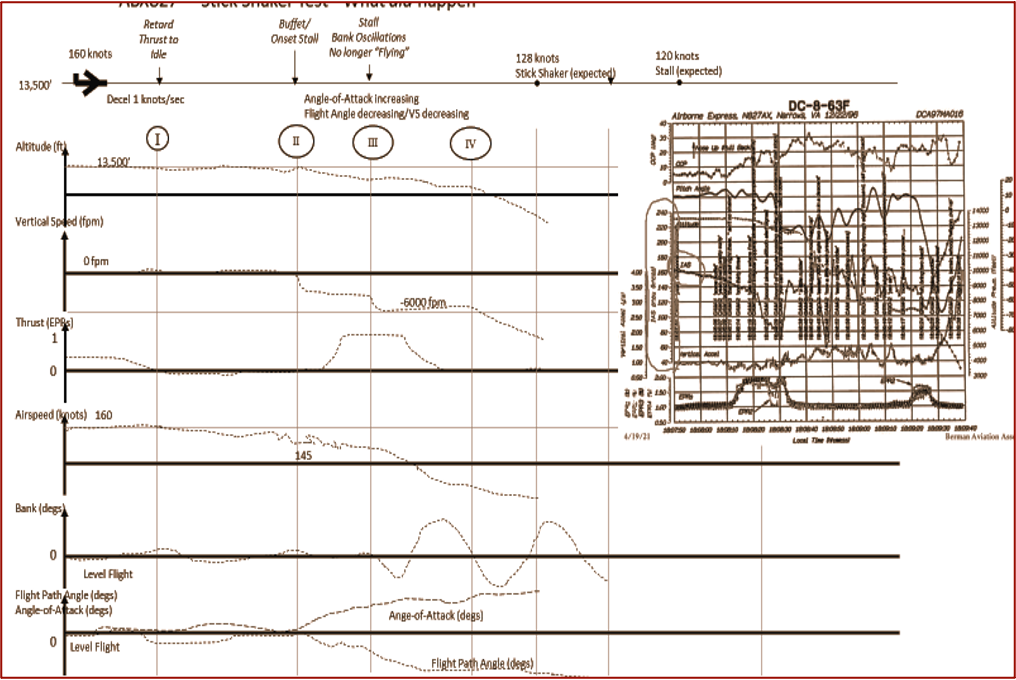

# Issues 
## flight path angle NaN
  *   airspeed is in knots
  *   vertical speed is calculated based on ft: (Current_Alt – Past_Alt)/Delta_Time
  *   Speed(ft/min) = Speed (kn) × 101.2685914252

### Fix
  * convert vertical spped to fpm: (Current_Alt – Past_Alt)/0.1
  * convert airspeed to fpm: airspeed = airspeed * 101.2685914252

*ref: http://www.conversion-website.com/speed/knot-to-foot-per-minute.html*

### Issues and fixes
  * convert all to fps - X
  * make sure airspeed is not cumulative - X
  * onset of stall is by contant
  * onset of stall shouldn't happen after uncommanged descent or roll
  * reclassify based on - 
    * Buffet 
    * Increasing positive Angle-of-Attack 
    * Decreasing airspeed 
    * Uncommanded descent (e.g. - 300 fpm) 
    * Decreasing airspeed - high 
    * Uncommanded roll 
    * Uncommanded descent – high (e.g. -1200 fpm) 

    -- 0 - level flight

    -- 1 - onset of buffet

    -- 2 - Uncommanded descent

    -- 3 - uncommanded roll and uncommanded descent hight


In [ ]:
# subset to 10k
import random 
import pandas as pd
model_data = pd.read_parquet('sim50k.pq')
names = model_data['name'].unique().tolist()
num_final = 10000
final_names = random.sample(names, num_final)
model_data[model_data['name'].isin(final_names)].to_parquet('tenk_data.pq')

In [ ]:
# read 10k and get unique names
tenk_df = pd.read_parquet('tenk_data.pq')
len(tenk_df.name.unique())
uniq_names = tenk_df.name.unique()

In [ ]:
from sklearn.model_selection import KFold
X = uniq_names
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    # get train and test data for this iteration
    train_names, test_names = X[train_index], X[test_index]
    tarin_df = tenk_df[tenk_df['name'].isin(train_names)]
    test_df = tenk_df[tenk_df['name'].isin(test_names)]
    # model train and validation sarts here
    ....
    ....
    ....

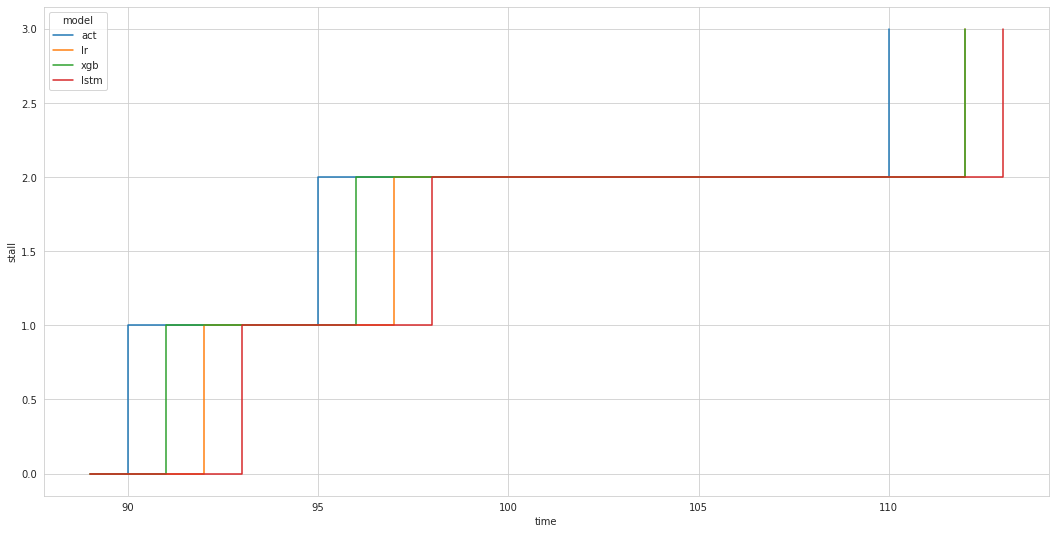

In [ ]:
x_df = pd.DataFrame([
                     ['act', 89, 0],
                     ['act', 90, 1],
                     ['act', 95, 2],
                     ['act', 110, 3],
                     ['lr', 89, 0],
                     ['lr', 92, 1],
                     ['lr', 97, 2],
                     ['lr', 112, 3],
                     ['xgb', 89, 0],
                     ['xgb', 91, 1],
                     ['xgb', 96, 2],
                     ['xgb', 112, 3],
                     ['lstm', 89, 0],
                     ['lstm', 93, 1],
                     ['lstm', 98, 2],
                     ['lstm', 113, 3],                                                               
                     ], columns = ['model', 'time', 'stall'])
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,9))
plt = sns.lineplot(data = x_df, x='time', y = 'stall', hue = 'model', ax = axs, drawstyle='steps-post')